In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
df = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned.parquet')
df_after = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned_after_user_removal.parquet')

In [111]:
df

,task,value,id_str,user_id,classification_id,created_at,subject_ids
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,disk-edge-on,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
2,bar,strong,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
3,has-spiral-arms,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
4,bulge-size,moderate,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
...,...,...,...,...,...,...,...
4827459,smooth-or-featured,featured-or-disk,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827460,disk-edge-on,yes,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827461,edge-on-bulge,none,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827462,clumps,no,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541


In [112]:
df = df.query('task=="smooth-or-featured"')
df_after = df_after.query('task=="smooth-or-featured"')

def add_week_year(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['week'] = df['created_at'].dt.isocalendar().week
    df['year'] = df['created_at'].dt.isocalendar().year
    df['week_year'] = df['year'].astype(str) + '-' + df['week'].astype(str)
    return df


df = add_week_year(df)
df_after = add_week_year(df_after)

/tmp/ipykernel_48917/2812756335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
/tmp/ipykernel_48917/2812756335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['created_at'].dt.isocalendar().week
/tmp/ipykernel_48917/2812756335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [113]:
# # group by week
# df['week'] = df['created_at'].dt.isocalendar().week
# df['year'] = df['created_at'].dt.isocalendar().year



<Axes: xlabel='created_at'>

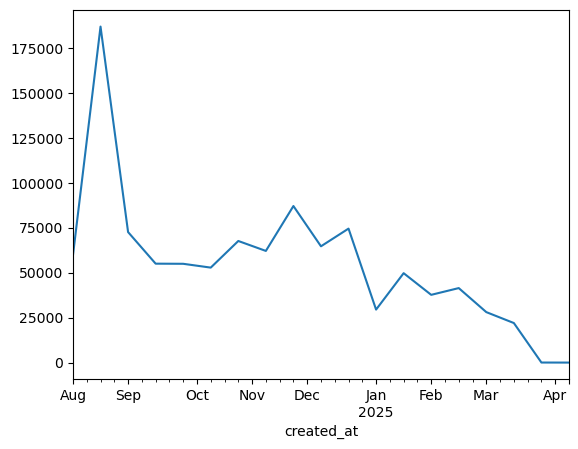

In [118]:
df.set_index('created_at').resample('2W').count()['user_id'].plot()

In [115]:
df['fortnight'] = df['created_at'].resample('2W')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [59]:
df_agg = df.groupby('week_year').agg({'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count']}).reset_index()
df_agg_after = df_after.groupby('week_year').agg({'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count']}).reset_index()

(0.0, 0.6352707366940005)

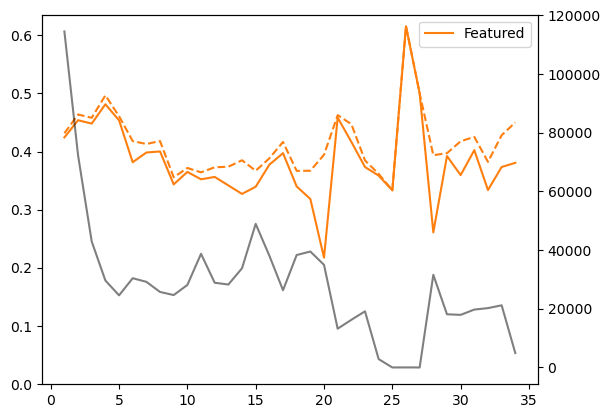

In [60]:
fig, ax = plt.subplots()

# add second axis
ax2 = ax.twinx()

# get default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# ax.plot(df_agg['value']['<lambda_0>'][1:-1], label='Smooth', color=colors[0])
# ax.plot(df_agg_after['value']['<lambda_0>'][1:-1], color=colors[0], linestyle='--')

ax.plot(df_agg['value']['<lambda_1>'][1:-1], label='Featured', color=colors[1])
ax.plot(df_agg_after['value']['<lambda_1>'][1:-1], color=colors[1], linestyle='--')

# ax.plot(df_agg['value']['<lambda_2>'][1:-1], label='Problem', color=colors[2])
# ax.plot(df_agg_after['value']['<lambda_2>'][1:-1], color=colors[2], linestyle='--')

ax2.plot(df_agg['value']['count'][1:-1], label='Count', color='black', alpha=.5)  # classifications per week
ax.legend()

ax.set_ylim([0., None])

# naively, shift away from featured and towards problem
# after accounting for users who say problem a weird amount, shift is much more moderate but still present

# featured fraction is around 0.45 in first few weeks and stablises around 0.35-0.4
# shift is mostly not from problematic users

# dashed is after removing problem users

In [70]:
df

,task,value,id_str,user_id,classification_id,created_at,subject_ids,week,year,week_year
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135,31,2024,2024-31
7,smooth-or-featured,featured-or-disk,98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...,290475,575637443,2024-08-01 12:33:05+00:00,101101075,31,2024,2024-31
16,smooth-or-featured,featured-or-disk,18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...,2403423,575637955,2024-08-01 12:38:36+00:00,101093977,31,2024,2024-31
25,smooth-or-featured,problem,7e9871caaeccc9e709002b24f8ff097cb47516de27f609...,2403423,575638057,2024-08-01 12:39:45+00:00,101091891,31,2024,2024-31
28,smooth-or-featured,featured-or-disk,c52a8096a07e5a8af5339408267172ebcab0041a802d28...,005c57be166317e1f905,575640326,2024-08-01 12:55:02+00:00,101086153,31,2024,2024-31
...,...,...,...,...,...,...,...,...,...,...
4827436,smooth-or-featured,featured-or-disk,62e76e3b023f81b5327a82b9195670e5f73298619667e9...,842168,625861632,2025-03-26 15:57:19+00:00,101518531,13,2025,2025-13
4827445,smooth-or-featured,featured-or-disk,77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...,2082107,627520987,2025-04-02 09:48:04+00:00,101519023,14,2025,2025-14
4827454,smooth-or-featured,smooth,6f3c4bc3ec03ced61f0deb818749575409883e471cc308...,2082107,627521019,2025-04-02 09:48:20+00:00,101518414,14,2025,2025-14
4827457,smooth-or-featured,problem,d7dd462d59cd3f1f6a6658e58f4f40b3c0b6169d5488c9...,2082107,627521051,2025-04-02 09:48:40+00:00,101517359,14,2025,2025-14


In [71]:
df_agg = df.groupby('user_id').agg({
    'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count'],
    'created_at': ['min', 'max']
    }).reset_index()
# plt.scatter(df_agg['value']['<lambda_0>'], df_agg['value']['<lambda_1>'], s=1.)

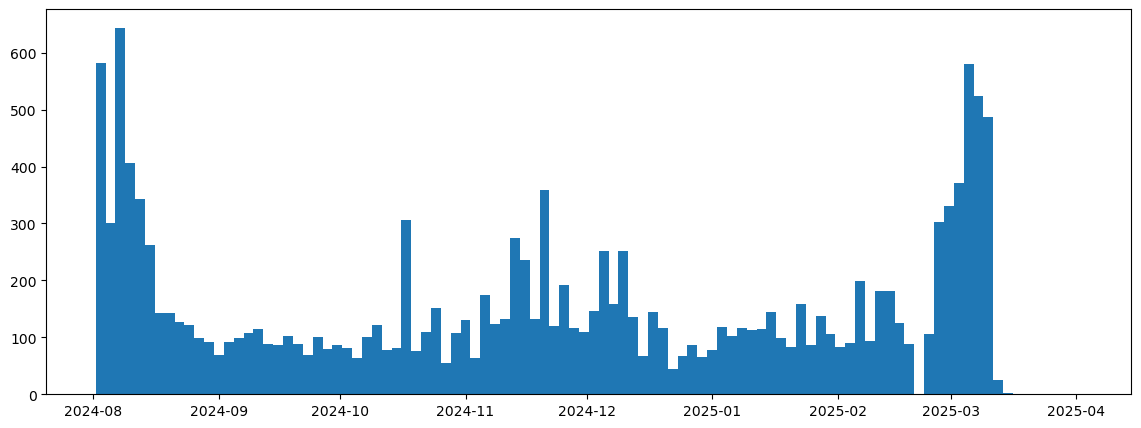

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
_ = plt.hist(df_agg['created_at']['max'], bins=100)
# many people don't stick around past the first two weeks in august

In [91]:
first_two_only_user = df_agg[df_agg['created_at']['max'] < "2024-08-18"]['user_id']
first_two_only_user

1        00271f0a2c2b52f8c35d
51       036d8f7db839326f9023
96       05cf5204823837e687d3
112      06f118ef227fd2551479
136      088baa8e98763888198d
                 ...         
14508    f4117ad2e631ab2324a9
14520    f4d5bb3f0de603a51e60
14583    f8710bb4e8cfc74fa59b
14669    fdcf18d97023ba1d8f0d
14690    fec1c8598380a3206027
Name: user_id, Length: 2660, dtype: object

0.020943832449340404

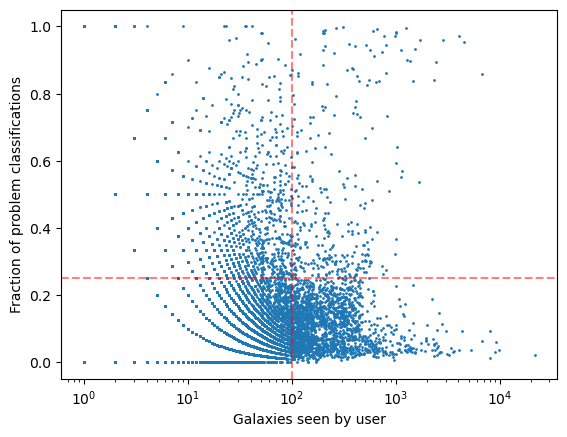

In [92]:
min_count = 100
max_problem_frac = 0.25

fig, ax = plt.subplots()
ax.scatter(df_agg['value']['count'], df_agg['value']['<lambda_2>'],  s=1.)
ax.set_xscale('log')
ax.set_xlabel('Galaxies seen by user')
ax.set_ylabel('Fraction of problem classifications')

ax.axhline(max_problem_frac, color='red', linestyle='--', alpha=.5)
ax.axvline(min_count, color='red', linestyle='--', alpha=.5)

((df_agg['value']['count'] > min_count) & (df_agg['value']['<lambda_2>'] > max_problem_frac)).mean()

Text(0, 0.5, 'Fraction of featured classifications')

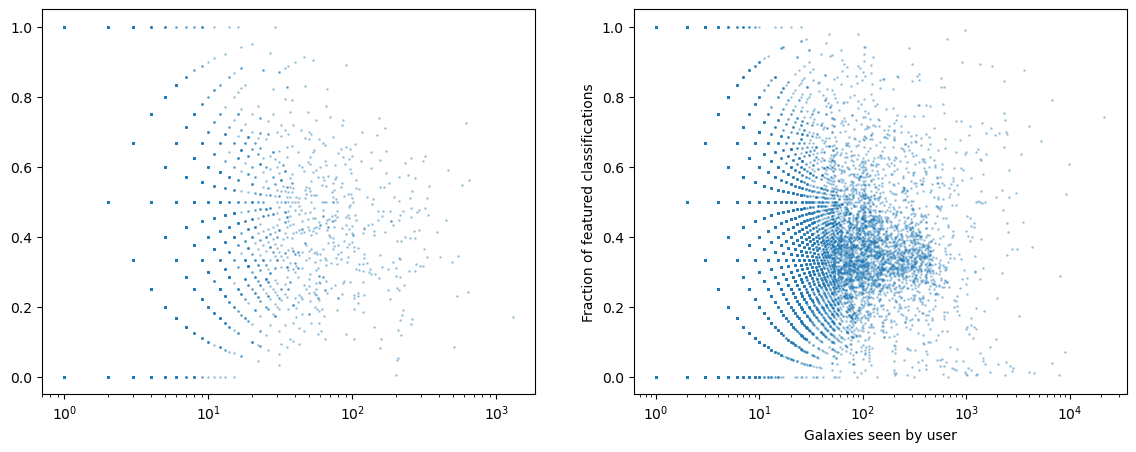

In [93]:
# suspicious users are both new (not continuing) and have a high featured fraction

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

first_two_clf = df_agg[df_agg['user_id'].isin(first_two_only_user)]
other_clf = df_agg[~df_agg['user_id'].isin(first_two_only_user)]

ax = axes[0]
ax.scatter(first_two_clf['value']['count'], first_two_clf['value']['<lambda_1>'],  s=1., alpha=.3)
ax.set_xscale('log')

ax = axes[1]
ax.scatter(other_clf['value']['count'], other_clf['value']['<lambda_1>'],  s=1., alpha=.3)
ax.set_xscale('log')

ax.set_xlabel('Galaxies seen by user')
ax.set_ylabel('Fraction of featured classifications')

# ax.axhline(max_problem_frac, color='red', linestyle='--', alpha=.5)
# ax.axvline(min_count, color='red', linestyle='--', alpha=.5)


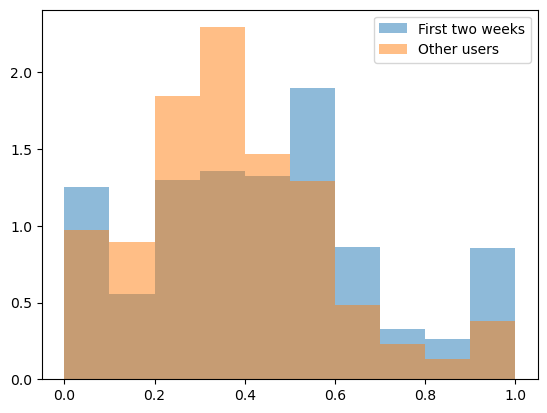

In [94]:
fig, ax = plt.subplots()


ax.hist(first_two_clf['value']['<lambda_1>'], density=True, histtype='stepfilled', alpha=.5, label='First two weeks')
ax.hist(other_clf['value']['<lambda_1>'], density=True, histtype='stepfilled', alpha=.5, label='Other users')
ax.legend()


In [ ]:
df_agg['<lambda_1>']

user_id      value                            
                            <lambda_0> <lambda_1> <lambda_2> count
0      00077d2c49fc107c3d30   0.421829   0.259587   0.318584   339
1      00271f0a2c2b52f8c35d   0.000000   1.000000   0.000000     1
2      004d31de06a09940ca64   0.520833   0.260417   0.218750    96
3      004f942011b381e78c8c   0.368421   0.473684   0.157895    19
4      005c57be166317e1f905   0.466667   0.466667   0.066667    15
...                     ...        ...        ...        ...   ...
14701  ff8da0173d6c4e43b0ad   0.200000   0.400000   0.400000     5
14702  ff9c4d5a182baa8010b2   0.572519   0.267176   0.160305   131
14703  ffc185df20745c02c87f   0.452471   0.365019   0.182510   263
14704  ffc7175ff207cce26189   0.444444   0.277778   0.277778    18
14705  fffaffabfb24fbbd6c4a   0.386503   0.263804   0.349693   489

[14706 rows x 5 columns]

In [119]:
# df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2024_12_23_ortho.csv')
# df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2024_12_23_after_user_removal_ortho.csv')
df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2025_04_17_ortho.csv')
# df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2025_04_17.csv')
df = df[df['smooth-or-featured-euclid_total-votes'] >= 5]
print(df['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())
more_than_twenty = df[df['smooth-or-featured-euclid_total-votes'] >= 20]
test_catalog = more_than_twenty

# could do this...
# train_and_val_catalog = df[~df.index.isin(test_catalog.index)]
# ...but nearly all have 5 (or 6) votes
# train_and_val_catalog['smooth-or-featured_total-votes'].hist(bins=30)
train_and_val_catalog = df[df['smooth-or-featured-euclid_total-votes'] ==5]


print(len(train_and_val_catalog), len(test_catalog))  
print(train_and_val_catalog['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())
print(test_catalog['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())  
# test catalog is collected earlier and therefore has a higher fraction of featured responses. user removal reduces mean shift by about a third, so still very present

0.3999434928149986
61546 2378
0.39869041042472303
0.4098127050803325


<Axes: >

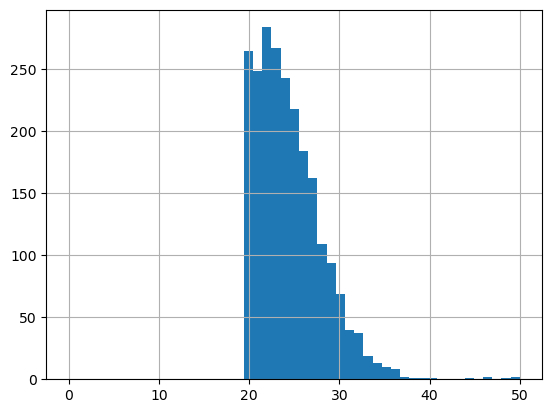

In [120]:
more_than_twenty['smooth-or-featured-euclid_total-votes'].hist(bins=np.linspace(0, 50))

In [121]:
len(test_catalog)

2378

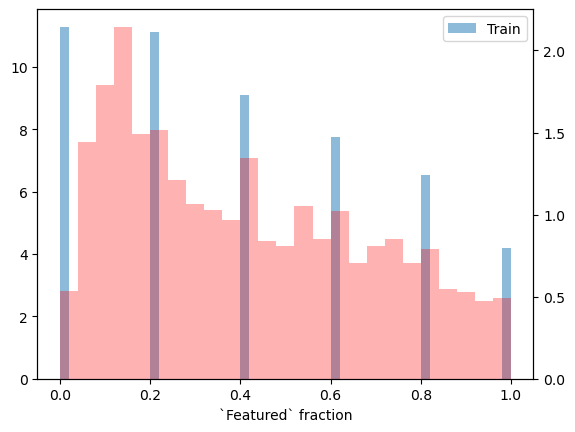

In [ ]:
train_and_val_catalog.columns = train_and_val_catalog.columns.str.replace('-euclid', '')
test_catalog.columns = test_catalog.columns.str.replace('-euclid', '')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(train_and_val_catalog['smooth-or-featured_featured-or-disk_fraction'], density=True, alpha=0.5, bins=50, label='Train')
ax2.hist(test_catalog['smooth-or-featured_featured-or-disk_fraction'], density=True, bins=25, label='Test (N=25 intensive)', alpha=.3, color='r')
# ax.hist(np.around(test_catalog['smooth-or-featured_featured-or-disk_fraction']*5, 0)/5, density=True, bins=50, label='Test (N=25 intensive)', alpha=.5)
ax.set_xlabel('`Featured` fraction')
ax.legend()
plt.show()

# after removing users who say problem, first three weeks of annotations, and all annotations to first phase test set, match is quite good
# hopefully this fixes prediction bias

In [123]:
len(df)

65957